# 📊 Instacart

**Author**: ENYA ALVAREZ BARROSO

**Date**: 09/25/2024

**Objective**: Data cleansing and preparation of a report that provides insight into the shopping habits of Instacart customers.

### Data Description

• instacart_orders.csv: Each row corresponds to an order in the Instacart app.

    - 'order_id': ID number that uniquely identifies each order.
    - 'user_id': ID number that uniquely identifies each customer's account.
    - 'order_number': The number of times this customer has placed an order.
    - 'order_dow': Day of the week an order was placed (0 if Sunday).
    - 'order_hour_of_day': Hour of the day the order was placed.
    - 'days_since_prior_order': Number of days since this customer placed their previous order.

• products.csv: Each row corresponds to a unique product that customers can purchase.

    - 'product_id': ID number that uniquely identifies each product.
    - 'product_name': Name of the product.
    - 'aisle_id': ID number that uniquely identifies each grocery aisle category.
    - 'department_id': ID number that uniquely identifies each grocery department.

• order_products.csv: Each row corresponds to an item ordered in an order.

    - 'order_id': ID number that uniquely identifies each order.
    - 'product_id': ID number that uniquely identifies each product.
    - 'add_to_cart_order': The sequential order in which each item was added to the cart.
    - 'reordered': 0 if the customer has never ordered this product before, 1 if they have.

• aisles.csv

    - 'aisle_id': ID number that uniquely identifies each grocery aisle category.
    - 'aisle': Aisle name.

• departments.csv

    - 'department_id': ID number that uniquely identifies each grocery department.
    - 'department': Department name.

# 1. Data Loading

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
df_instacart = pd.read_csv(r"C:\Users\DELL\Documents\Proyectos\Instacart\data.xlsx\instacart_orders.csv", sep=';')
df_instacart.info()
print()
df_products = pd.read_csv(r"C:\Users\DELL\Documents\Proyectos\Instacart\data.xlsx\products.csv", sep=';')
df_products.info()
print()
df_aisles = pd.read_csv(r"C:\Users\DELL\Documents\Proyectos\Instacart\data.xlsx\aisles.csv", sep=';')
df_aisles.info()
print()
df_departments = pd.read_csv(r"C:\Users\DELL\Documents\Proyectos\Instacart\data.xlsx\departments.csv", sep=';')
df_departments.info()
print()
df_orders = pd.read_csv(r"C:\Users\DELL\Documents\Proyectos\Instacart\data.xlsx\order_products.csv", sep=';')
df_orders.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage

# 2. Data preprocessing

**`instacart_orders` data frame**

In [8]:
# Duplicate analysis
print(df_instacart.duplicated().sum())
print() # Check for duplicate orders
df_instacart[df_instacart.duplicated()]

15



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


15 duplicate rows were found in the instacart_orders dataframe. These rows represent identical orders in all columns (order_id, user_id, order_number, etc.).

• Interpretation:

    ○ Possible cause:

        - Error in data collection or loading (repeated records).
        - Failure to generate unique order_ids.

    ○ Impact:

        Duplicates can skew metrics such as "total number of orders" or "purchase frequency."

Duplicates will be removed with df_instacart.drop_duplicates() to avoid skew in the analysis.

In [10]:
# Check all orders placed on Wednesday at 2:00 a.m.
wend_two = df_instacart[(df_instacart['order_dow'] == 3) & (df_instacart['order_hour_of_day'] == 2)]
wend_two[wend_two.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


15 orders placed on Wednesday (order_dow = 3) at 2:00 a.m. were filtered. All of these orders are the same duplicates identified previously.

• Interpretation:

    ○ Unusual pattern:
        It is unusual for users to place orders late in the morning (2:00 a.m.). This could be due to:

        - Automated behavior (bots or scripts).
        - Users in different time zones (if the data is not standardized).
        - Errors in the time stamp (order_hour_of_day).

    ○ Null data:
        Some orders have 'days_since_prior_order = NaN' (new customers or first-time order).

In [12]:
# Remove duplicate orders
df_instacart_new = df_instacart.merge(df_orders,
                                      left_on='order_id',
                                      right_on='product_id',
                                      suffixes=['_order', '_user'])

df_instacart_new = df_instacart.drop_duplicates()
df_instacart_new

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [13]:
# Check again for duplicate rows
print(df_instacart_new.duplicated().sum())

0


In [14]:
# Recheck for duplicate order IDs
print(df_instacart_new['order_id'].duplicated().sum())

0


📊 **Duplicate Order Removal**

• Duplicate rows were removed from the df_instacart dataframe.

• The new df_instacart_new dataframe now contains 478,966 unique rows (it originally had 478,966 + 15 duplicates = 478,981 rows).

• All values ​​in the order_id column are unique.

    ○ Ensures that each order is represented only once in the analysis.
    ○ Avoid overestimating metrics such as "total orders" or "frequency per user."

**`products` data frame**

In [17]:
# Check for completely duplicate rows
print(df_products.duplicated().sum())

0


In [18]:
# Check for duplicate product names (convert names to uppercase for comparison 'medf_products.duplicated().sum()')
df_products['product_name'] = df_products['product_name'].str.lower()

print(df_products['product_name'].duplicated().sum())

1361


In [19]:
# Check for duplicate names of non-missing products
print(df_products['product_name'].duplicated())
print()
print(df_products[df_products['product_name'] == 'original pancake & waffle mix'])

0        False
1        False
2        False
3        False
4        False
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Name: product_name, Length: 49694, dtype: bool

       product_id                   product_name  aisle_id  department_id
25892       25893  original pancake & waffle mix       130             14
49690       49691  original pancake & waffle mix       130             14


📊 **Check for Completely Duplicate Rows**

    • There are no completely duplicate rows (with all identical values ​​in product_id, product_name, aisle_id, and department_id).

📊 **Check for Duplicate Product Names**

    • There are 1,361 duplicate product names (same name but possibly different product_ids).
    
        ○ Observation: Two different IDs (25893 and 49691) share the same name, aisle (aisle_id=130), and department (department_id=14).

🔍 **Interpretation and Identified Problems**

🟣 **Causes of Duplicates:**

    • Undetected Variants: Example: "Organic Milk" vs. "organic milk" (already normalized to lowercase).

    • Input Errors: Same product registered multiple times with different IDs.

    • Identical products under different brands: Example: Coca-Cola vs. Pepsi.

🟣 **Impact on Analysis:**

    • Overestimating popularity: If a product appears twice, it could be counted twice in sales analysis.

    • Incorrect grouping: When calculating metrics by product_name, duplicates would inflate results.

**`departments` data frame**

In [22]:
# Check for completely duplicate rows
print(df_departments.duplicated().sum())

0


In [23]:
# Check for duplicate product IDs
print(df_departments['department_id'].duplicated().sum())

0


**`aisles` data frame**

In [25]:
# Check for completely duplicate rows
print(df_aisles.duplicated().sum())

0


In [26]:
# Check for duplicate product IDs
print(df_aisles['aisle_id'].duplicated().sum())

0


**`order_products` data frame**

In [28]:
# Check for completely duplicate rows
print(df_orders.duplicated().sum())

0


In [29]:
# Double-check for any other misleading duplicates
print(df_orders.duplicated().sum())

0


No duplicate data was found in the 'departments', 'aisles', and 'order_products' data frames.

# 3. Data Cleansing

**`products` data frame**

In [33]:
# Find missing values in the 'product_name' column
df_products_av = df_products['product_name'].isna()

df_products_new = df_products[df_products_av]
print(df_products_new)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [34]:
# Are all missing product names related to aisle with ID 100?
print(df_products_new['aisle_id'].duplicated())
print()
print(df_products_new[df_products_new['aisle_id'] == 100])

37       False
71        True
109       True
296       True
416       True
         ...  
49552     True
49574     True
49640     True
49663     True
49668     True
Name: aisle_id, Length: 1258, dtype: bool

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


• **Clear pattern:** Missing names are concentrated exclusively in aisle_id 100.

• **Possible causes:**

    ○ Data loading error for that specific aisle.

    ○ Generic or unnamed products in that category.

In [36]:
# Are all missing product names related to department with ID 21?
print(df_products_new['department_id'].duplicated())
print()
print(df_products_new[df_products_new['department_id'] == 21])

37       False
71        True
109       True
296       True
416       True
         ...  
49552     True
49574     True
49640     True
49663     True
49668     True
Name: department_id, Length: 1258, dtype: bool

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


🟣 **Relationship between aisle_id and department_id:**
The missing values (NaN) are concentrated in products from aisle_id 100, which all belong to department_id 21.

This suggests the issue might be due to:

1. A specific category (e.g., generic or temporary products).

2. A systematic data loading error for that particular department/aisle.

• **Pattern:** All missing product_name values are linked to the same aisle_id (100) and department_id (21), indicating a localized issue.

In [38]:
# Use the department and isolate tables to review the data for aisle with ID 100 and department with ID 21.
print(df_products_new[(df_products_new['aisle_id'] == 100) & (df_products_new['department_id'] == 21)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [39]:
# Complete missing product names with 'Unknown'
df_products_new.loc[:, 'product_name'] = df_products_new['product_name'].fillna('Unknown')
print(df_products_new)

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


By changing the data from 'NaN' to 'Unknown', the DF can more effectively conclude that they are values ​​equal to 0 or nothing, unlike 'NaN' which considers them as absent and that is when we have problems with the code.

**`orders` data frame**

In [42]:
# Find the missing values
df_instacart_av = df_instacart['days_since_prior_order'].isna()

df_instacart_new = df_instacart[df_instacart_av]
print(df_instacart_new)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [43]:
# Are there any missing values other than the customer's first order?
print(df_instacart_new['order_number'].duplicated())
print()
print(df_instacart_new[df_instacart_new['order_number'] == 1])

28        False
96         True
100        True
103        True
104        True
          ...  
478895     True
478896     True
478922     True
478926     True
478945     True
Name: order_number, Length: 28819, dtype: bool

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1       

With the data obtained we can conclude that all missing values ​​are only from the customer's first order.

**`order_products` data frame**

In [46]:
# Find the missing values
df_orders_av = df_orders['add_to_cart_order'].isna()

df_orders_new = df_orders[df_orders_av]
print(df_orders_new)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [47]:
# What are the minimum and maximum values ​​in this column?
print(df_orders['add_to_cart_order'].min(), df_orders['add_to_cart_order'].max())

1.0 64.0


We can say that only values ​​from 1 to 64 are found, since they represent the sequential order in which each item was added to the cart.

In [49]:
# Save all order IDs that have a missing value in 'add_to_cart_order'
id_null_values = df_orders[(df_orders['add_to_cart_order'].isna())]['order_id']
print(id_null_values)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [50]:
df_orders_id_null = pd.merge(df_orders,
                             id_null_values.drop_duplicates(),
                             how='inner',
                             on='order_id'
                            )
print(df_orders_id_null)

      order_id  product_id  add_to_cart_order  reordered
0      2094761       31469               57.0          1
1      2449164        5068                NaN          0
2      2997021        4920               37.0          0
3       871281       40063               61.0          1
4       171934       36397                7.0          0
...        ...         ...                ...        ...
5311   2621907       32018               28.0          1
5312    102236       34688               49.0          0
5313   2256933       41544               21.0          0
5314    180546       12741               46.0          1
5315   2136777       20072               10.0          0

[5316 rows x 4 columns]


In [51]:
# Do all orders with missing values have more than 64 products?
df_orders_group = df_orders_id_null.groupby('order_id').count()
#df_orders_group
print(df_orders_group[df_orders_group['product_id']>=64])

          product_id  add_to_cart_order  reordered
order_id                                          
9310              65                 64         65
61355            127                 64        127
102236            95                 64         95
129627            69                 64         69
165801            70                 64         70
...              ...                ...        ...
2999801           70                 64         70
3125735           86                 64         86
3308010          115                 64        115
3347453           71                 64         71
3383594           69                 64         69

[70 rows x 3 columns]


Missing data is associated with orders with a high quantity of products (≥64), indicating a possible systematic error in large orders.

In [53]:
# Do all orders with missing values ​​have more than 64 products?
df_orders_group = df_orders_id_null.groupby('order_id').count()
#df_orders_group
print(df_orders_group[df_orders_group['product_id']>=64])

# Group all orders with missing data by their order ID.
print()
print(df_orders_group.groupby('order_id')['product_id'].count().sort_values(ascending=False))
print()

# Count the number of 'product_id' in each order and check the minimum count value.
print(df_orders_group['product_id'].count().min())

          product_id  add_to_cart_order  reordered
order_id                                          
9310              65                 64         65
61355            127                 64        127
102236            95                 64         95
129627            69                 64         69
165801            70                 64         70
...              ...                ...        ...
2999801           70                 64         70
3125735           86                 64         86
3308010          115                 64        115
3347453           71                 64         71
3383594           69                 64         69

[70 rows x 3 columns]

order_id
9310       1
1916118    1
2170451    1
2136777    1
2094761    1
          ..
1477139    1
1529171    1
1564093    1
1598369    1
3383594    1
Name: product_id, Length: 70, dtype: int64

70


All orders do not exceed the quantity of 64 products ordered, this may be because that is the quantity in stock they have in the store.

In [55]:
# Replace missing values ​​in column 'add_to_cart? with 999 and convert the column to integer type.
df_orders_new.loc[:, 'add_to_cart_order'] = df_orders_new['add_to_cart_order'].fillna(999).astype(int)

print(df_orders_new.isnull().sum())
print("\nSample de 'add_to_cart_order':")
print(df_orders_new['add_to_cart_order'].head())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Sample de 'add_to_cart_order':
737      999.0
9926     999.0
14394    999.0
16418    999.0
30114    999.0
Name: add_to_cart_order, dtype: float64


• **Transformation Successful:**

    The missing values ​​in add_to_cart_order were replaced with 999 and the column was converted to an integer without errors.

• **Data Quality:**

    The DataFrame now has no nulls in any column (verified with .isnull().sum()).

# Conclusions

It's very important to understand what each column in each DataFrame represents so you know which values ​​should be modified and which ones should be left unchanged to avoid affecting the data analysis. On the other hand, it's very important to know what to do with missing values, as these can become a headache in the future.

# 4. Data analysis

In [60]:
print(df_instacart_new.sort_values(by='order_hour_of_day', ascending=False))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
283366   2407152   139329             1          2                 23   
441800   1156854   148301             1          0                 23   
13709    2624354   148456             1          0                 23   
208817   3168756    78994             1          6                 23   
165220    197024    97051             1          1                 23   
...          ...      ...           ...        ...                ...   
68801    1561394    34064             1          5                  0   
343844     81924   128474             1          4                  0   
372202     91495   173558             1          3                  0   
412565    354739    99757             1          6                  0   
213341   1148384    84091             1          5                  0   

        days_since_prior_order  
283366                     NaN  
441800                     NaN  
13709                   

In [61]:
print(df_instacart_new.sort_values(by='order_dow', ascending=False))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
108295   2047326   106498             1          6                 11   
48706    2422826    30452             1          6                  9   
160668    359680    85278             1          6                 13   
160566   1982735    55197             1          6                 11   
287812    612938   169872             1          6                 16   
...          ...      ...           ...        ...                ...   
110878   3012562    21325             1          0                 16   
347648    139330   184130             1          0                 10   
347627   2848578    40292             1          0                 17   
347595   3271235    62566             1          0                 15   
240303   2221391    30867             1          0                 11   

        days_since_prior_order  
108295                     NaN  
48706                      NaN  
160668                  

The values ​​for the 'order_hour_of_day' and 'order_dow' columns range from 0 - 23 for 'order_hour_of_day' and from 0 - 6 for 'order_dow'.

<Axes: title={'center': 'Orders by Hour'}, xlabel='Hour', ylabel='Orders'>

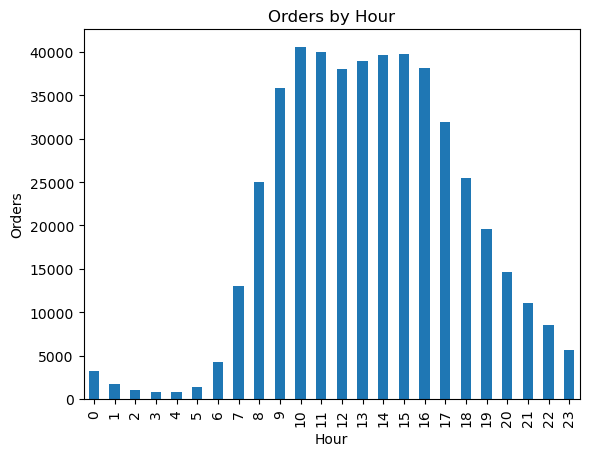

In [63]:
# For each hour of the day, how many people place orders?
user_hour_day = df_instacart.groupby(['order_hour_of_day'])['order_id'].count()
user_hour_day.plot(x='order_hour_of_day',
                   y='order_id',
                   title='Orders by Hour',
                   xlabel='Hour',
                   ylabel='Orders',
                   kind='bar'
                  )

🟣 **Demand Pattern:**

    ○ Peak Hours:

        • Maximum activity between 10:00 AM and 3:00 PM (midday).

        • Small peak around 8:00 AM and 9:00 AM (breakfast/morning shopping time).

    ○ Off-peak Hours:

        • Minimum activity between 12:00 AM and 6:00 AM (early morning).

🟣 **General Trend:**

   ○ Demand increases progressively from 6:00 AM, peaks at midday, and decreases after 4:00 PM.

🟣 **Numerical Data:**

    ○ The Y-axis shows that orders per hour range from ~5,000 (evening) to ~35,000 (midday).

🟣 **Consumer Behavior:**

    ○ Users prefer to place orders during daylight hours, especially around lunchtime.

<Axes: title={'center': 'Orders by Day of the Week'}, xlabel='Days', ylabel='Orders'>

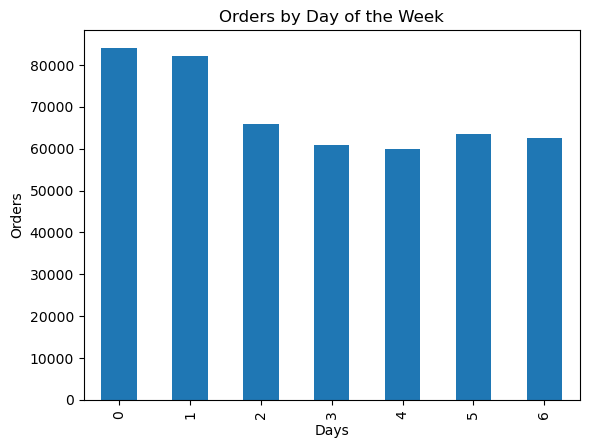

In [65]:
# What day of the week do people buy groceries?
day_of_week = df_instacart.groupby(['order_dow'])['order_id'].count()
day_of_week.plot(x='order_dow',
                 y='order_id',
                 title='Orders by Day of the Week',
                 xlabel='Days',
                 ylabel='Orders',
                 kind='bar'
                )

🟣 **Days with Highest Demand:**

    ○ Sunday (0) and Saturday (6): Peak activity, typical for supermarket shopping (free days for planning purchases).

    ○ Monday (1) or Tuesday (2): Slight increase compared to intermediate days (possibly due to post-weekend restocking).

🟣 **Days with Lowest Demand:**

    ○ Wednesday to Friday (3-5): Fewer orders, coinciding with weekdays.

🟣 **Difference Between Days:**

    ○ The difference between the busiest and least busy days can be significant.

📄 **Interpretation:**

    ○ Resource Planning:

        • Increase staffing/logistics on weekends (Sunday/Saturday).

        • Offer promotions on Wednesdays and Fridays to balance demand.

    ○ Possible Causes:

        • Users prefer to shop when they have more free time (e.g., weekends).

        • Large purchases to stock up at the beginning of the week.

<Axes: title={'center': 'Time people wait to place another order'}, xlabel='Time', ylabel='Users'>

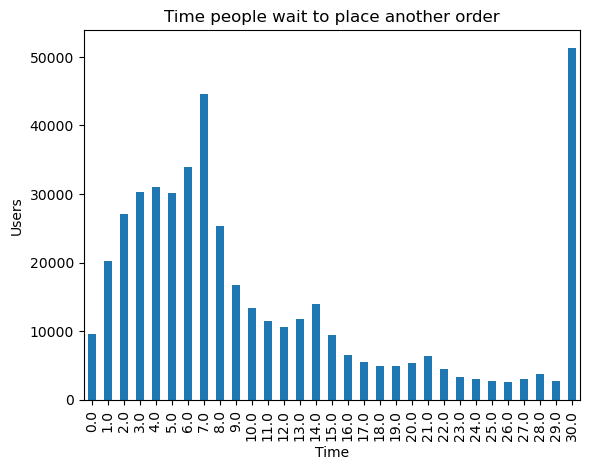

In [67]:
# How long do people wait before placing another order?
time_to_wait = df_instacart.groupby(['days_since_prior_order'])['order_id'].count()
time_to_wait.plot(x='days_since_prior_order',
                 y='order_id',
                 title='Time people wait to place another order',
                 xlabel='Time',
                 ylabel='Users',
                 kind='bar'
                )

🟣 **Dominant Patterns:**

    ○ 7-Day Peak: Most users place their next order exactly one week later (recurring weekly behavior).

    ○ 30-Day Peak: Second major peak, suggesting a monthly cycle (e.g., restocking non-perishable items).

    ○ Days 1-3: Low frequency, indicating that few users purchase consecutively.

🟣 **General Trends:**

    ○ Clustering in multiples of 7: Many users follow weekly cycles (7, 14, 21, 28 days).

    ○ Value 0.0: Possible cases of same-day orders (should be verified if this is an error or multiple purchases).

🟣 **Atypical Data:**

    ○ Days between 15 and 29 have low frequency, except around 30.


📄 **Interpretation:**

    ○ User Behavior:

        • Loyalty: Spikes in 7 and 30 days suggest structured habits (e.g., weekly grocery shopping).

    ○ Opportunities:

        • Send reminders/promotions around the 7th or 30th day to encourage repeat purchases.

        • Investigate why few users purchase between days 8-14.

    ○ Potential Errors:

        • days_since_prior_order = 0: Could be:

            - Orders canceled and reordered.

In [69]:
# Difference between Wednesdays and Saturdays for 'order_hour_of_day'.
wednesday = df_instacart[df_instacart['order_dow'].isin([2])]
wen_hor = wednesday.groupby(['order_dow','order_hour_of_day'])['order_dow'].count()
wen_hor
# Filter for Wednesdays '2'

order_dow  order_hour_of_day
2          0                     462
           1                     240
           2                     136
           3                     104
           4                     109
           5                     196
           6                     653
           7                    1900
           8                    3485
           9                    5057
           10                   5489
           11                   5365
           12                   5066
           13                   5234
           14                   5344
           15                   5260
           16                   5322
           17                   4525
           18                   3672
           19                   2787
           20                   2061
           21                   1481
           22                   1130
           23                    755
Name: order_dow, dtype: int64

<Axes: title={'center': 'Wednesday hours in which users placed orders'}, xlabel='Day and Hour', ylabel='User Requests'>

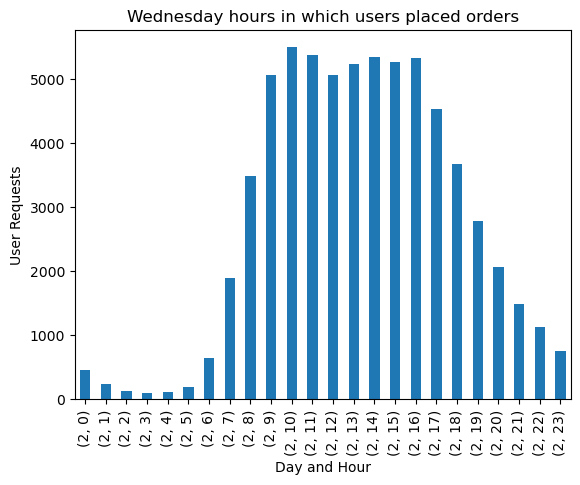

In [70]:
# Graphic of the day Wednesday
wen_hor.plot(x='order_dow',
             y='order_hour_of_day',
             title='Wednesday hours in which users placed orders',
             xlabel='Day and Hour',
             ylabel='User Requests',
             kind='bar'
            )

🟣 **Peak Hours:**

    ○ Peak: Between 10:00 AM and 4:00 PM (business hours, possibly shopping during breaks or lunch).

    ○ Morning Subpeak: Around 8:00 AM and 9:00 AM (before the start of the workday).

🟣 **Off-peak Hours:**

    ○ Early Morning (12:00 AM and 6:00 AM): Minimum activity (users asleep).

    ○ Evening (9:00 PM and 11:00 PM): Gradual decrease after 8:00 PM.

🟣 **Order Range:**

    ○ The bars show from ~0 to ~5,000 orders per hour.

📄 **Interpretation:**

    ○ User Behavior:

        • On Wednesdays, users prefer to shop during the day, especially around midday.

        • Few orders are placed at night/early morning (similar to other weekdays).

    ○ Recommendations:

        • Increase delivery driver availability between 10:00 AM and 4:00 PM.

        • Peak Hour Promotions: Offer discounts during off-peak hours (e.g., 7:00 AM and 9:00 AM) to balance demand.

In [72]:
saturday = df_instacart[df_instacart['order_dow'] == 5]
sat_hor = saturday.groupby('order_hour_of_day')['order_id'].count()
sat_hor
# Filter for Saturdays '5'

order_hour_of_day
0      459
1      219
2      123
3       99
4      118
5      229
6      654
7     1933
8     3373
9     4794
10    5347
11    5325
12    4836
13    5108
14    5265
15    5352
16    4991
17    4169
18    3441
19    2597
20    1886
21    1368
22    1028
23     774
Name: order_id, dtype: int64

<Axes: title={'center': 'Orders by Hour on Saturdays'}, xlabel='Day and Hour', ylabel='Total Request'>

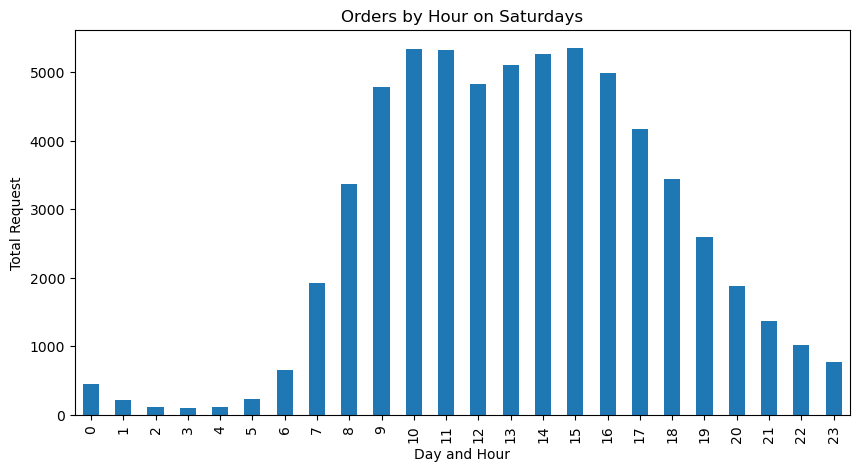

In [73]:
# Graphic of the day Saturday
sat_hor.plot(kind='bar', 
              title='Orders by Hour on Saturdays',
              xlabel='Day and Hour',
              ylabel='Total Request',
              figsize=(10, 5))

🟣 **General Pattern Observed**

The graph shows the distribution of orders over the 24 hours on Saturday, revealing:

    ○ Peak Hours (Highest Demand):

        • 10:00 AM - 4:00 PM: Peak activity, coinciding with usual shopping times (e.g., after breakfast or before lunch).

        • Secondary Peak (8:00 AM - 9:00 AM): Morning shopping for the weekend.

    ○ Off-Peak Hours (Least Demand):

        • 12:00 AM - 6:00 AM: Minimum activity (early morning).

        • 9:00 PM - 11:00 PM: Progressive decrease towards the evening.


🟣 **Behavioral Interpretation**

    ○ Causes of Peaks:

        • Users take advantage of Saturday (a non-working day for many) to make large purchases or plan meals.

        • The midday peak can be related to shopping for family gatherings or events.
        
    ○ Causes of Valleys:

        • Early Morning: Rest hours.

        • Evening: Less need for urgent purchases.

In [75]:
# What is the distribution for the number of orders per customer?
user_ord = df_instacart.groupby(['order_number'])['order_id'].count()
# Filtering to group the number of orders with their users

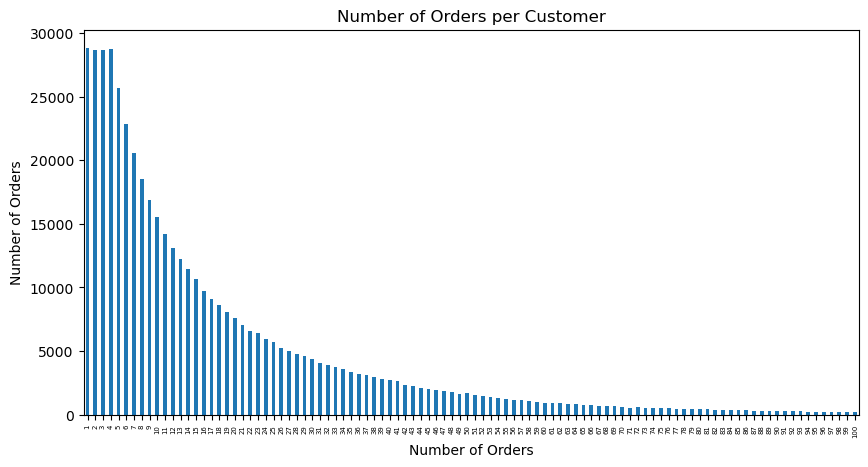

In [76]:
user_ord.plot(x='order_number',
              y='order_id',
              title='Number of Orders per Customer',
              xlabel='Number of Orders',
              ylabel='Number of Orders',
              rot=90,
              kind='bar',
              figsize= (10,5)
             )
plt.xticks(fontsize=5)
plt.show()

📌 **Typical Patterns:**

    • Rapid Decay: Most customers have few orders (e.g., 1-5), and very few have many orders (e.g., >20). This is normal in e-commerce.

    • Initial Peak: The highest bar is usually 1 order, indicating many customers who only purchased once.

    • Long Tail: Some returning customers (e.g., >10 orders) appear on the right side of the chart.

📄 **Interpretation:**

    • Customer Loyalty:

        ○ If the bar for one order is very high, there is a high rate of non-return customers (opportunity to improve retention).

        ○ If there are few customers with many orders, they could be "VIP customers" (opportunity for loyalty programs).

    • Possible Actions:

        ○ For customers with one order: Remarketing campaigns (e.g., discounts on the second order).

        ○ For returning customers: Reward programs (e.g., points for each purchase).

In [78]:
# What are the 20 most popular products?
pop_products_merge = pd.merge(df_products,
                              df_orders,
                              how='inner',
                              left_on='product_id',
                              right_on='product_id'
                             )

In [79]:
group_prod_merge = pop_products_merge.groupby(['product_name'])['product_id'].count().head(20)

group_prod_merge = group_prod_merge.to_frame().reset_index()
print(group_prod_merge)

                                       product_name  product_id
0                                 #2 coffee filters         110
1                      #2 cone white coffee filters           2
2                             #2 mechanical pencils           3
3                   #4 natural brown coffee filters          39
4            & go! hazelnut spread + pretzel sticks          15
5     (70% juice!) mountain raspberry juice squeeze           4
6      +energy black cherry vegetable & fruit juice           7
7           0 calorie acai raspberry water beverage          12
8          0 calorie fuji apple pear water beverage          24
9   0 calorie strawberry dragonfruit water beverage          23
10               0% fat black cherry greek yogurt y          22
11                    0% fat blueberry greek yogurt          77
12                         0% fat free organic milk         579
13   0% fat greek yogurt black cherry on the bottom          19
14                      0% fat greek yog

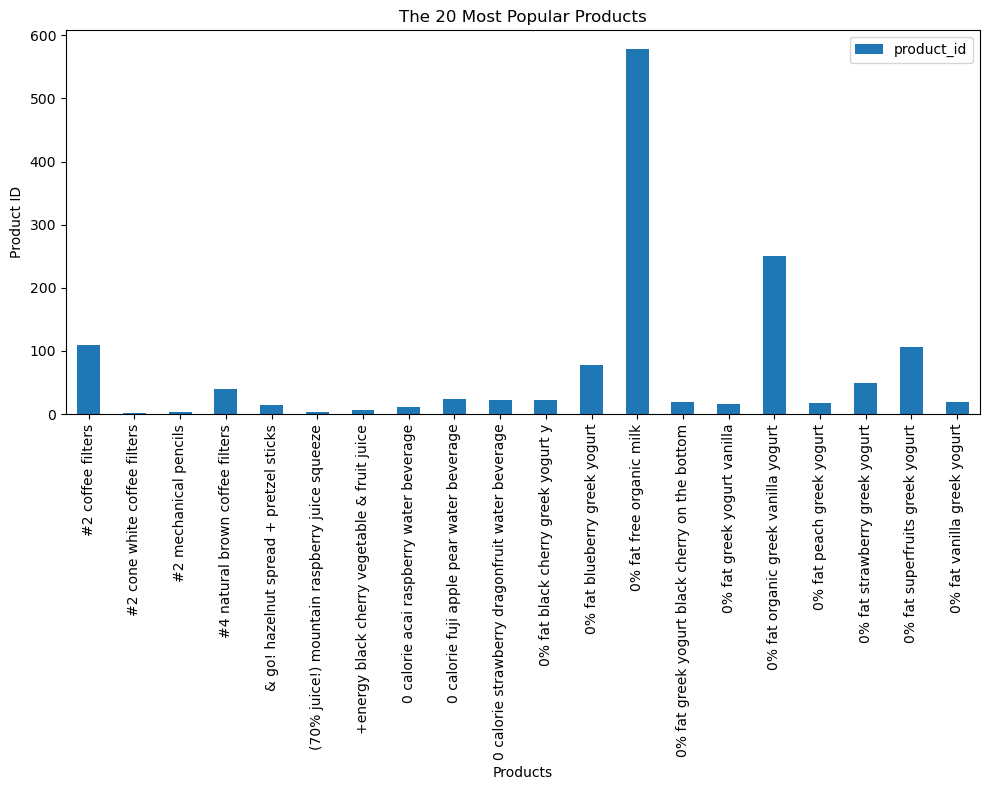

In [80]:
group_prod_merge.plot(x='product_name',
                      y='product_id',
                      title='The 20 Most Popular Products',
                      xlabel='Products',
                      ylabel='Product ID',
                      rot=90,
                      kind='bar',
                      figsize=(10, 8)
                     )

plt.xticks(fontsize=10)

plt.tight_layout()

plt.show()

📌 **Key Findings:**

• **Dominant Products:**

    ○ Low-fat dairy products (Greek yogurts in flavors such as strawberry, vanilla, and blueberry) and coffee filters appear to be the most popular.

    ○ Healthy beverages (calorie-free flavored waters and juices) are also in high demand.

• **Consumption Patterns:**

    ○ Customers prefer healthy options (0% fat, no calories) and basic products (coffee, dairy).

    ○ Descriptive names with specific flavors ("strawberry, dragonfruit," "black cherry") attract more attention.

📄 **Commercial Interpretation:**

• **Health Trends:**

    ○ The popularity of Greek yogurts and zero-calorie beverages reflects a preference for nutritious, low-sugar foods.

• **Marketing Opportunities:**

    ○ Highlight health benefits in campaigns (e.g., "0% fat," "natural").

    ○ Combination packs (e.g., yogurt + coffee filters) to drive cross-selling.

• **Inventory:**

    ○ Ensure sufficient stock of key products (especially yogurts and coffee filters).

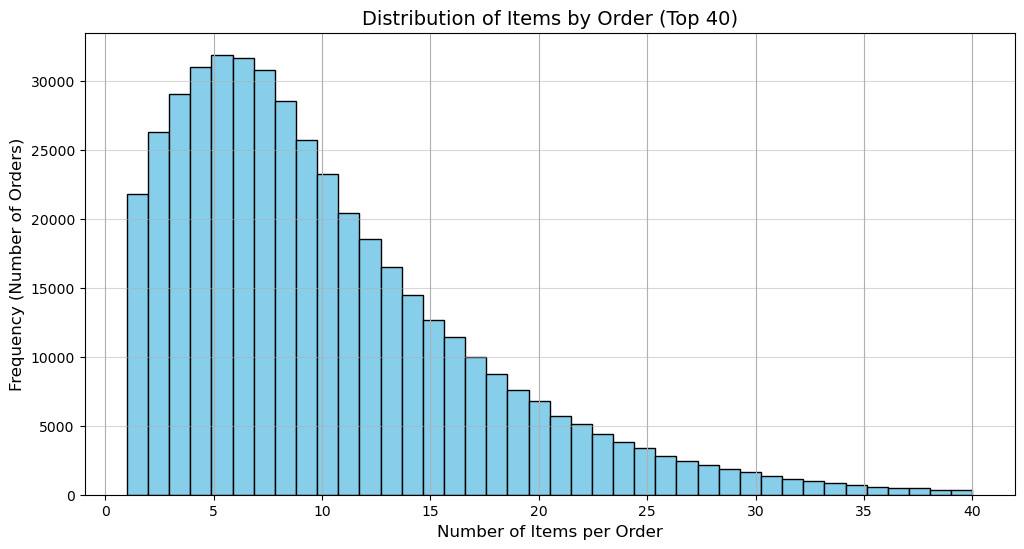

In [82]:
# How many items do people typically buy in one order? What's the distribution like?
num_order = df_orders.groupby(['order_id']).count()

top_items = num_order[num_order['product_id'] <= 40]['product_id']

plt.figure(figsize=(12, 6))
top_items.hist(bins=40, color='skyblue', edgecolor='black')

plt.title('Distribution of Items by Order (Top 40)', fontsize=14)
plt.xlabel('Number of Items per Order', fontsize=12)
plt.ylabel('Frequency (Number of Orders)', fontsize=12)
plt.grid(axis='y', alpha=0.5)

plt.show()

📌 **Key Findings:**

🟣 **Purchasing Pattern:**

    • Sharp Peak (5-15 items):

        ○ Most orders are small or medium-sized, typical of daily or weekly purchases.

        ○ Example: If the peak is at 10 items, it means that many customers purchase around 10 products per order.

    • Long Tail (16-40 items):

        ○ Decreasing frequency of larger orders (e.g., monthly purchases or special events).

        ○ Orders with >30 items are infrequent (potentially wholesale customers or large families).

🟣 **Implied Statistics:**

    • Mean (avg): Probably between 10-20 items (depending on the peak).

    • Median (median): Close to the peak value (e.g., ~12 items).

    • Mode: The most frequent value (e.g., 8 items).

📄 **Commercial Interpretation:**

🟣 **For Small Orders (1-15 items):**

    • Optimize logistics: Prioritize speed for small orders (fast deliveries).

    • Upselling: Suggest complementary products (e.g., "Did you forget the coffee for your yogurt?").

🟣 **For Large Orders (16-40 items):**

    • Volume discounts: Incentivize large purchases.

    • Loyalty programs: Reward repeat customers with multiple items.

🟣 **Outliers (>40 items):**

    • If they exist, validate whether they are errors (e.g., duplicate orders) or business customers.

In [84]:
print(f"Mean: {top_items.mean():.1f} items per order")
print(f"Median: {top_items.median()} items per order")
print(f"Mode: {top_items.mode().values[0]} items (most frequent)")

Mean: 9.9 items per order
Median: 8.0 items per order
Mode: 5 items (most frequent)


In [85]:
num_order['product_id'].describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

• **Standard deviation (std): 7.54**

    Indicates that the data are spread out around the mean. Many orders deviate ±7-8 items from the mean (e.g., from 2 to 18 items).

• **Percentiles:**

    ○ 25% (5 items): 25% of orders are small (≤5 items).

    ○ 75% (14 items): Only 25% of orders exceed 14 items.

• **Range (min=1, max=127):**

    There are extreme orders (e.g., 1 item or up to 127). The latter could be errors or wholesale purchases.

🟣 **Business Conclusions**

• **Majority Behavior:**

    ○ Most customers purchase between 5 and 14 items (interquartile range).

    ○ The typical order is small (mode=5), but the mean is inflated by some large orders.

• **Opportunities:**

    ○ For small orders (1-5 items):

        ▪️ Promote "ideal add-ons" to increase cart size (e.g., "Want to add a coffee to your yogurt?").

    ○ For medium-sized orders (6-14 items):

        ▪️ Offer free shipping on orders of 10 or more items to encourage larger purchases.

    ○ For outliers (more than 30 items):

        ▪️ Investigate whether they are returning customers (opportunity for B2B programs) or data errors.

In [87]:
# What are the top 20 most frequently reordered items?
df_merged = pd.merge(df_products,
                     df_orders,
                     how='inner',
                     left_on='product_id',
                     right_on='product_id'
                    )

In [88]:
df_products


,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [89]:
df_orders

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [90]:
print(df_merged)

         product_id                product_name  aisle_id  department_id  \
0                 1  chocolate sandwich cookies        61             19   
1                 1  chocolate sandwich cookies        61             19   
2                 1  chocolate sandwich cookies        61             19   
3                 1  chocolate sandwich cookies        61             19   
4                 1  chocolate sandwich cookies        61             19   
...             ...                         ...       ...            ...   
4545002       49694     burrito- steak & cheese        38              1   
4545003       49694     burrito- steak & cheese        38              1   
4545004       49694     burrito- steak & cheese        38              1   
4545005       49694     burrito- steak & cheese        38              1   
4545006       49694     burrito- steak & cheese        38              1   

         order_id  add_to_cart_order  reordered  
0         1104373               11.0 

In [91]:
popular_prod = df_merged.groupby('product_name').count()
df_popular_prod_value = popular_prod.sort_values(by='product_id', ascending=False)['add_to_cart_order'].head(20)

In [92]:
df_popular_prod_value

product_name
banana                      66046
bag of organic bananas      53295
organic strawberries        37035
organic baby spinach        33970
organic hass avocado        29772
organic avocado             24689
large lemon                 21495
strawberries                20017
limes                       19689
organic whole milk          19600
organic raspberries         19194
organic yellow onion        15897
organic garlic              15290
organic zucchini            14584
organic blueberries         13879
cucumber kirby              13674
organic fuji apple          12544
organic lemon               12231
apple honeycrisp organic    11992
organic grape tomatoes      11781
Name: add_to_cart_order, dtype: int64

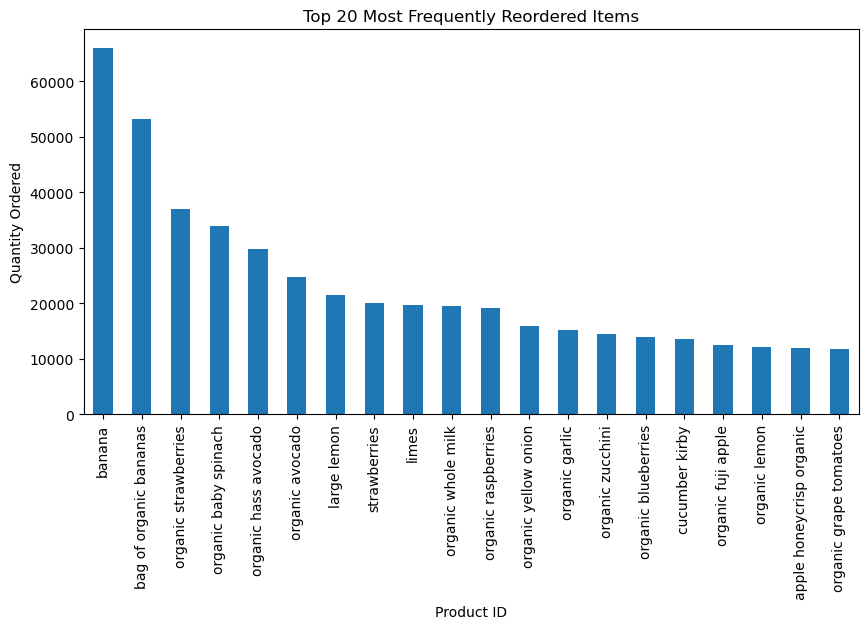

In [93]:
df_popular_prod_value.plot(x='product_id',
                  y='add_to_cart_order',
                  title='Top 20 Most Frequently Reordered Items',
                  xlabel='Product ID',
                  ylabel='Quantity Ordered',
                  rot=90,
                  kind='bar',
                  figsize= (10,5)
                 )
plt.xticks(fontsize=10)
plt.show()

📌 **Key Findings:**

🟣 **Most Reordered Products (Dominant):**

    • Organic Fruits:

        ○ Banana and Organic Bananas lead the ranking (possibly because they are everyday staples).

        ○ Organic Strawberries, Organic Raspberries, and Organic Blueberries also stand out (high demand for seasonal fruits).

    • Vegetables and Dairy:

        ○ Organic Baby Spinach, Organic Hass Avocado, and Organic Whole Milk reflect a preference for fresh and healthy foods.

🟣 **Consumption Patterns:**

    • Organic = Priority: 15/20 products are organic, indicating a clear preference for pesticide-free foods.

    • Fruits > Vegetables: Fruits have higher reorder volumes than vegetables (e.g., strawberries vs. organic zucchini).

🟣 **Popularity Scale:**

The most reordered product (banana) has a significantly higher volume than the last one in the top 20 (organic grape tomatoes), suggesting a large gap in demand.

📄 **Commercial Interpretation:**

🟣 **Purchasing Trends:**

    • Health and Convenience: Customers prefer organic, ready-to-eat products (e.g., washed fruit, ready-to-drink milk).

    • Recurring Staples: Products like bananas and milk are frequently purchased (ideal for subscription programs).

🟣 **Marketing Opportunities:**

    • "Recurring" Bundles:

        Create bundles with top products (e.g., "Healthy Breakfast Pack": bananas + milk + berries).

    • Loyalty Programs:

        Automatic reorder discounts for the 5 most popular products.

    • Inventory and Supply:

        Ensure permanent stock of leading products (avoid stockouts of organic bananas or strawberries).

In [182]:
# For each product, what is the proportion of times it is ordered and what is the proportion of times it is reordered?
# df_orders, 'product_id'=Product ID, 'reordered'=0 if a customer has never ordered a product and 1 if they have ordered it

proporcion_prod = df_merged.groupby('product_name')['reordered'].mean()

In [184]:
proporcion_prod

product_name
#2 coffee filters                                    0.254545
#2 cone white coffee filters                         0.000000
#2 mechanical pencils                                0.000000
#4 natural brown coffee filters                      0.358974
& go! hazelnut spread + pretzel sticks               0.466667
                                                       ...   
zzzquil alcohol-free nighttime liquid sleep aid      0.200000
zzzquil liquid warming berry flavor sleep-aid        0.285714
zzzquil nighttime liquid sleep-aid twin pack         0.636364
zzzquil nighttime sleep-aid liquicaps                0.454545
zzzquil vanilla cherry nighttime liquid sleep aid    1.000000
Name: reordered, Length: 44517, dtype: float64

In [186]:
print(proporcion_prod.sort_values(ascending=False))

product_name
zzzquil vanilla cherry nighttime liquid sleep aid                                1.0
anti-breakage with vitamin e strengthening shampoo                               1.0
vareniki w/ potato and onion                                                     1.0
vanishing acne treatment cream                                                   1.0
garlic olives                                                                    1.0
                                                                                ... 
complete nutrition on-the-go milk-based singles powder packets infant formula    0.0
instant espresso sticks                                                          0.0
shredded chicken & chicken liver recipe                                          0.0
shredded chicken street taco + ancho aioli                                       0.0
kale pesto with white cheddar pasta sauce                                        0.0
Name: reordered, Length: 44517, dtype: float64


The results show the proportion of times a product is reordered (purchased again by the same customers) in relation to the total number of times it was ordered.

📌 **Key Findings:**

• **Products with high repurchase (reordered = 1.0):**

    Example:

    ○ zzzquil vanilla cherry nighttime liquid sleep aid (100% reordered).

    ○ garlic olives (100% reordered).

    Interpretation:

    ○ These are products with high loyalty (customers consistently return them).

    ○ They are likely staples for quick consumption (medications, perishable foods) or of high perceived quality.

• **Products with low repurchase (reordered = 0.0):**

    Example:

    ○ kale pesto with white cheddar pasta sauce (0% reordered).

    ○ instant espresso sticks (0% reordered).

    Interpretation:

    ○ These may be niche products, occasionally purchased, or with low satisfaction.

    ○ They could also be new items that don't yet have sufficient data.

• **Products with medium repurchase:**

    Example:

    ○ & go! Hazelnut spread + pretzel sticks (~46.7% reordered).

    ○ #4 natural brown coffee filters (~35.9% reordered).

    Interpretation:

    ○ Products with moderate demand (not essential, but with a recurring audience).

    ○ Could improve with promotions or quality adjustments.

In [198]:
# For each customer, what proportion of your products had they already ordered?
df_client_merged = pd.merge(df_instacart,
                            df_orders,
                            how='inner',
                            left_on='order_id',
                            right_on='order_id'
                           )

In [200]:
# 'order_number'=number of times the customer has made this order, 'user_id'=ID of each customer
proporcion_cliente = df_client_merged.groupby('user_id')['reordered'].mean()
proporcion_cliente

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

In [202]:
print(proporcion_cliente.sort_values(ascending=False))

user_id
96430     1.0
69003     1.0
199910    1.0
203290    1.0
140076    1.0
         ... 
190953    0.0
119371    0.0
63173     0.0
63163     0.0
165726    0.0
Name: reordered, Length: 149626, dtype: float64


This analysis shows what percentage of products in each customer order are reordered (i.e., products the customer has previously purchased). This helps us understand customer purchasing habits and loyalty.

📌 **Key Findings:**

• **Customers with a High Reorder Rate (reordered ≈ 1.0):**

    Example:

    ○ user_id 96430, 69003, 199910 (100% reorder rate).

    Interpretation:

    ○ These are customers who almost always repeat the same products.

    ○ They may purchase essential items (e.g., basic groceries, medications) or are very loyal to certain brands.

    ○ Ideal for loyalty strategies (subscription programs, repurchase discounts).

• **Customers with a Low Reorder Rate (reordered ≈ 0.0):**

    Example:

    ○ user_id 190953, 119371, 63173 (0% reorder rate).

    Interpretation:

    ○ Customers who try new products with each order or find no value in repeating.

    ○ They could be occasional buyers or dissatisfied with the current offering.

    ○ Action: Investigate if there are quality, price, or experience issues.

• **Intermediate Rate Customers (e.g., 0.2–0.8):**

    Example:

    ○ user_id 206203 (22.2%), 206209 (32%).

    Interpretation:

    ○ They mix new products with some returning ones.

    ○ Opportunity to recommend products similar to those they already reorder.

In [207]:
# What are the top 20 items people put first in their carts?

top_items = df_merged[df_merged['add_to_cart_order']==1]['product_name'].value_counts().head(20)

In [209]:
print(top_items)

product_name
banana                         15562
bag of organic bananas         11026
organic whole milk              4363
organic strawberries            3946
organic hass avocado            3390
organic baby spinach            3336
organic avocado                 3044
spring water                    2336
strawberries                    2308
organic raspberries             2024
sparkling water grapefruit      1914
organic half & half             1797
large lemon                     1737
soda                            1733
organic reduced fat milk        1397
limes                           1370
hass avocados                   1340
organic reduced fat 2% milk     1310
half & half                     1309
organic yellow onion            1246
Name: count, dtype: int64


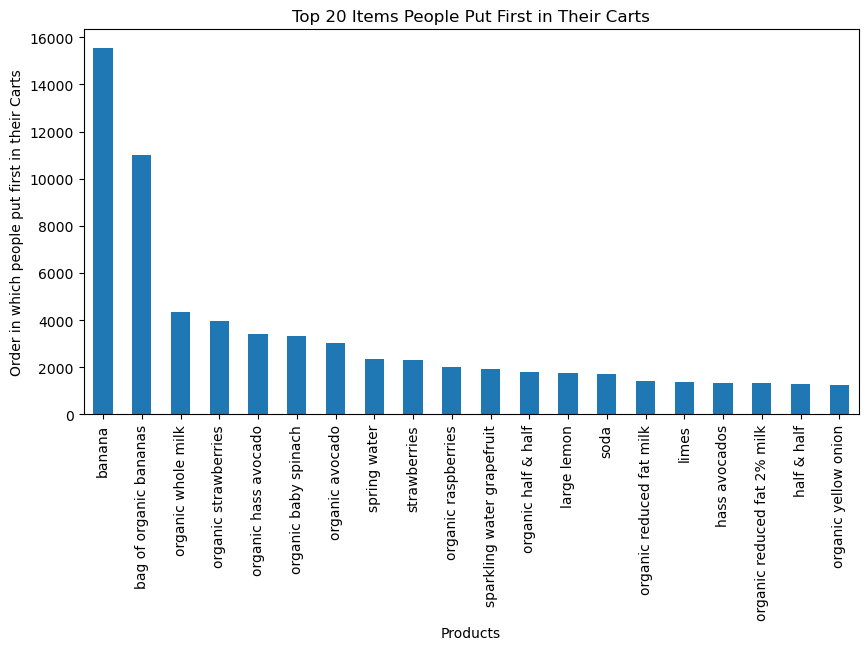

In [216]:
top_items.plot(x='product_name',
              y='add_to_cart_order',
              title='Top 20 Items People Put First in Their Carts',
              xlabel='Products',
              ylabel='Order in which people put first in their Carts',
              rot=90,
              kind='bar',
              figsize= (10,5)
             )
plt.xticks(fontsize=10)
plt.show()

This bar chart shows the products customers tend to add to the top of their shopping cart (lowest order in add_to_cart_order). This reveals consumer purchasing habits and priorities.

📌 **Key Findings:**

• **Most frequently added to the top of the cart:**

    ○ Banana (top position).

    ○ Organic whole milk.

    ○ Organic strawberries.

    ○ Organic Hass avocado.

• **Observed patterns:**

    ○ Fresh staples: Fruits (banana, strawberries, avocado), dairy (milk, half & half), and vegetables (spinach, onion) dominate the list.

    ○ Organic products: 8 of the 15 items are organic, suggesting a preference for healthy/natural products.

    ○ Beverages: Spring water and sparkling water are also prioritized.

🔍 **Psychological/Behavioral Interpretation:**

    • Focus on essentials: Customers begin their shopping with basic, perishable, or high-needs products (e.g., milk, fruit), leaving non-essentials for later.

    • Health and Convenience: The high presence of organic products reflects a trend toward healthy choices.

    • Shopping list habits: Many shoppers follow a mental order (e.g., fresh first, then canned).

📊 **Actionable Insights:**

• **Physical store placement:**

    ○ Place these products at the back of the store to increase exposure to other items ("must-visit" strategy).

• **Digital Marketing:**

    ○ Highlight them on the front page of the e-commerce site or with "frequently purchased" banners.

    ○ Promotional bundles (e.g., "Healthy Breakfast Kit" with banana + milk + strawberries).

• **Inventory Management:**

    ○ Ensure sufficient stock of these products, especially during peak times (mornings/weekends).

• **Cross-recommendations:**

    ○ If a customer adds banana first, suggest additional options (e.g., cereal or honey).

# General conclusion of the project:

People tend to buy more frequently, products with short shelf lives, such as:

🍌 **Fruits**
🥬 **Vegetables**

Since these are items consumed daily, and due to their short shelf life, they need to be consumed within a maximum of one week of purchase, they are therefore added first to customers' carts.

🥫 Products with expiration dates (and therefore a longer shelf life) are products that customers can see being purchased once or twice a month, since if they make a purchase, they are unlikely to finish the product in less than one week, as there is no concern that the product will expire.

🧼 On the other hand, personal hygiene products are not food products, so their shelf life is much longer than any other product, so they are purchased less frequently.

Therefore, the products that should be stocked in the store are fresh ones, such as fruits and vegetables, as they generate the most profit and the most traffic in the store. Therefore, proper care must be taken to maintain or improve their quality and preservation.